B站：同济子豪兄（https://space.bilibili.com/1900783）

微信公众号：人工智能小技巧

张子豪 2021-07-12

# 导入工具包

In [2]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [3]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入模型

In [4]:
# 导入solution
mp_pose = mp.solutions.pose

# # 导入绘图函数
mp_drawing = mp.solutions.drawing_utils 

# 导入模型
pose = mp_pose.Pose(static_image_mode=True,        # 是静态图片还是连续视频帧
                    model_complexity=2,            # 选择人体姿态关键点检测模型，0性能差但快，2性能好但慢，1介于两者之间
                    smooth_landmarks=True,         # 是否平滑关键点
                    enable_segmentation=True,      # 是否人体抠图
                    min_detection_confidence=0.5,  # 置信度阈值
                    min_tracking_confidence=0.5)   # 追踪阈值

# 读入图像，输入模型，获取预测结果

In [5]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person1.jfif')
# img = cv2.imread('test.jpg')

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

In [6]:
results

mediapipe.python.solution_base.SolutionOutputs

# 人体抠图结果

In [7]:
mask = results.segmentation_mask

In [8]:
mask.shape

(1001, 666)

In [9]:
img.shape

(1001, 666, 3)

In [10]:
mask

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.3182834e-10,
        3.5952494e-10, 3.6695785e-10],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.1810927e-10,
        4.2693588e-10, 4.5637455e-10],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.8412652e-10,
        5.1414589e-10, 5.4764943e-10],
       ...,
       [2.9239874e-12, 2.9300577e-12, 2.9382529e-12, ..., 1.9332030e-15,
        2.0534573e-15, 2.2196918e-15],
       [2.9268753e-12, 2.9379123e-12, 2.9471712e-12, ..., 2.1476169e-15,
        2.3171169e-15, 2.4478215e-15],
       [2.9308283e-12, 2.9430904e-12, 2.9537974e-12, ..., 2.3988668e-15,
        2.5027736e-15, 2.7167061e-15]], dtype=float32)

In [11]:
mask = mask > 0.5

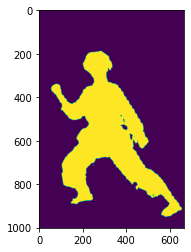

In [12]:
plt.imshow(mask)
plt.show()

In [13]:
import numpy as np

# 单通道转三通道
mask_3 = np.stack((mask,mask,mask), axis=-1)

MASK_COLOR = [0,200,0]
fg_image = np.zeros(img.shape, dtype=np.uint8)
fg_image[:] = MASK_COLOR

# 获得前景人像
FG_img = np.where(mask_3, img, fg_image)

# 获得抠掉前景人像的背景
BG_img = np.where(~mask_3, img, fg_image)

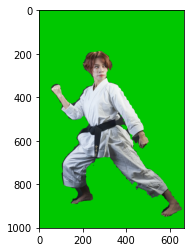

In [14]:
look_img(FG_img)

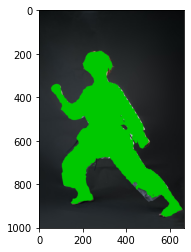

In [15]:
look_img(BG_img)

# 所有关键点检测结果

In [16]:
results.pose_landmarks

landmark {
  x: 0.42978426814079285
  y: 0.2802823781967163
  z: -0.7078507542610168
  visibility: 0.9999991655349731
}
landmark {
  x: 0.4412020146846771
  y: 0.2621484398841858
  z: -0.6699750423431396
  visibility: 0.999998927116394
}
landmark {
  x: 0.4519912600517273
  y: 0.26173391938209534
  z: -0.669528603553772
  visibility: 0.9999992847442627
}
landmark {
  x: 0.4624840319156647
  y: 0.2610827088356018
  z: -0.6695629954338074
  visibility: 0.9999991655349731
}
landmark {
  x: 0.4066564738750458
  y: 0.26363298296928406
  z: -0.6556926369667053
  visibility: 0.9999974966049194
}
landmark {
  x: 0.39446163177490234
  y: 0.26430657505989075
  z: -0.6550707817077637
  visibility: 0.9999935626983643
}
landmark {
  x: 0.38137754797935486
  y: 0.2653961479663849
  z: -0.6568449139595032
  visibility: 0.9999910593032837
}
landmark {
  x: 0.4687594771385193
  y: 0.2703929841518402
  z: -0.4509894549846649
  visibility: 0.9999942779541016
}
landmark {
  x: 0.3624381721019745
  y: 0.27

In [17]:
mp_pose.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [18]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.6200001239776611
y: 0.4735395312309265
z: -0.46769076585769653
visibility: 0.9962891340255737

In [19]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[13]

x: 0.6200001239776611
y: 0.4735395312309265
z: -0.46769076585769653
visibility: 0.9962891340255737

In [20]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[13].x

0.6200001239776611

# 解析指定关键点的像素坐标

In [21]:
img.shape

(1001, 666, 3)

In [22]:
h = img.shape[0]
w = img.shape[1]

In [23]:
# 左胳膊肘关键点像素横坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * w

412.9200825691223

In [24]:
# 左胳膊肘关键点像素纵坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * h

474.01307076215744

# 解析指定关键点的真实物理（米）坐标

In [25]:
results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE]

x: -0.1029285416007042
y: -0.5426493287086487
z: -0.2707839012145996
visibility: 0.9999991655349731

In [26]:
results.pose_world_landmarks.landmark[23]

x: 0.0797455683350563
y: 0.009893214330077171
z: -0.030796626582741737
visibility: 0.9994723200798035

真实物理坐标的原点位于左右髋关节连线的中点（肚脐附近），详见论文。

# 交互式三维可视化

In [27]:
import numpy as np

In [28]:
coords = np.array(results.pose_landmarks.landmark)

In [29]:
coords

array([x: 0.42978426814079285
       y: 0.2802823781967163
       z: -0.7078507542610168
       visibility: 0.9999991655349731, x: 0.4412020146846771
                                       y: 0.2621484398841858
                                       z: -0.6699750423431396
                                       visibility: 0.999998927116394,
       x: 0.4519912600517273
       y: 0.26173391938209534
       z: -0.669528603553772
       visibility: 0.9999992847442627, x: 0.4624840319156647
                                       y: 0.2610827088356018
                                       z: -0.6695629954338074
                                       visibility: 0.9999991655349731,
       x: 0.4066564738750458
       y: 0.26363298296928406
       z: -0.6556926369667053
       visibility: 0.9999974966049194, x: 0.39446163177490234
                                       y: 0.26430657505989075
                                       z: -0.6550707817077637
                                       

In [30]:
len(coords)

33

In [31]:
coords[0].x

0.42978426814079285

In [32]:
# 在不用耗时循环的条件下，汇总所有点的XYZ坐标

def get_x(each):
    return each.x
def get_y(each):
    return each.y
def get_z(each):
    return each.z

# 分别获取所有关键点的XYZ坐标
points_x = np.array(list(map(get_x, coords)))
points_y = np.array(list(map(get_y, coords)))
points_z = np.array(list(map(get_z, coords)))

# 将三个方向的坐标合并
points = np.vstack((points_x, points_y, points_z)).T

In [33]:
points.shape

(33, 3)

In [34]:
points

array([[ 0.42978427,  0.28028238, -0.70785075],
       [ 0.44120201,  0.26214844, -0.66997504],
       [ 0.45199126,  0.26173392, -0.6695286 ],
       [ 0.46248403,  0.26108271, -0.669563  ],
       [ 0.40665647,  0.26363298, -0.65569264],
       [ 0.39446163,  0.26430658, -0.65507078],
       [ 0.38137755,  0.26539615, -0.65684491],
       [ 0.46875948,  0.27039298, -0.45098945],
       [ 0.36243817,  0.27397317, -0.38215917],
       [ 0.44657576,  0.297171  , -0.62313843],
       [ 0.40809289,  0.30070591, -0.60361063],
       [ 0.51639438,  0.36008257, -0.42005435],
       [ 0.33249509,  0.38416067, -0.07442482],
       [ 0.62000012,  0.47353953, -0.46769077],
       [ 0.24507807,  0.47591707, -0.04791998],
       [ 0.70264113,  0.56672776, -0.61576194],
       [ 0.14783835,  0.3917475 , -0.23477572],
       [ 0.73600173,  0.59570581, -0.65819365],
       [ 0.12317166,  0.36717746, -0.2635709 ],
       [ 0.7186833 ,  0.5984993 , -0.71733958],
       [ 0.12478486,  0.35924366, -0.291

In [35]:
import open3d
point_cloud = open3d.PointCloud()
point_cloud.points = open3d.Vector3dVector(points)
open3d.draw_geometries([point_cloud])